# Televison Data Analysis

In [167]:
#importing dependencies and csv file
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

filepath = os.path.join('Resources/TV data index.csv')
index_df = pd.read_csv(filepath, header=0) 

In [168]:
index_df.head()

,series,network,Type,# Eps,Air Day,National Time,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,APV,AirDay_Num,APV_logarithm,Engagement_index
0,series1317,network13,Broadcast,20,MTWRF,0.291667,earlymorning,120.0,14781161,1.155655e+07,35.05,5,30.421180,1.152158
1,series509,network5,Broadcast,20,MTWRF,0.291667,earlymorning,120.0,12743372,9.929613e+06,35.04,5,30.421180,1.151829
2,series831,network13,Broadcast,20,MTWRF,0.770833,earlyfringe,30.0,9944649,3.573048e+06,68.33,5,60.697849,1.125740
3,series1157,network4,Broadcast,20,MTWRF,0.291667,earlymorning,120.0,8792309,6.309503e+06,33.37,5,30.421180,1.096933
4,series58,network5,Broadcast,23,MTWRFS,0.770833,earlyfringe,30.0,8615800,2.998523e+06,66.21,6,60.697849,1.090813


## Network Performance based on Engagement Index

In [169]:
#Preparing dataset
indexNet = index_df[['series', 'network', 'Engagement_index']]
indexNet_grp = indexNet.groupby(['network']).agg(['mean', 'sem'])
indexNet_grp.columns = indexNet_grp.columns.map('_'.join)
indexNet_grp = indexNet_grp.reset_index()
sorted_indexNet = indexNet_grp.sort_values('Engagement_index_mean', ascending =False)
sorted_indexNet.head()

,network,Engagement_index_mean,Engagement_index_sem
48,network53,1.318270,0.542377
50,network55,1.242172,0.204189
64,network68,1.207212,NaN
57,network61,1.140251,0.042736
5,network14,1.121886,0.059637


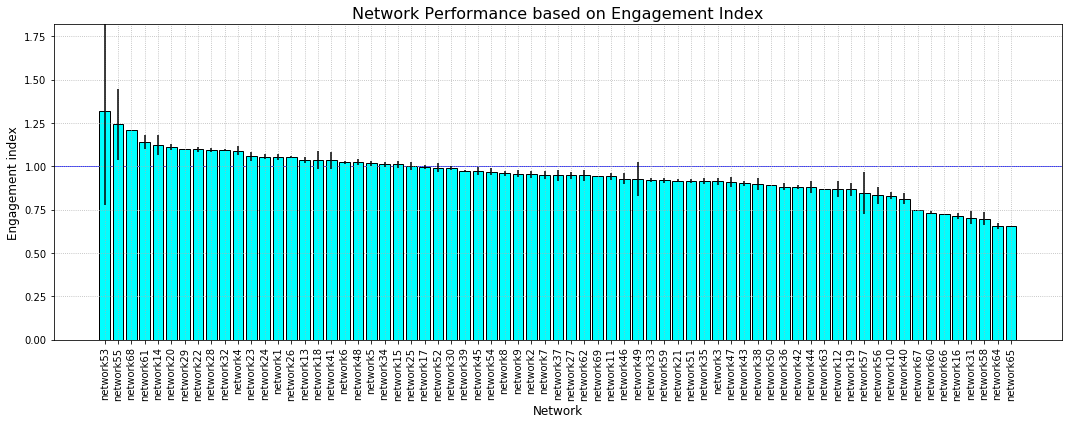


Better performing network is presented by all the bars the crossed blue dotted line



In [183]:
#Plotting network and engagement index
# data lists
network = sorted_indexNet['network'].tolist()
index_network = sorted_indexNet['Engagement_index_mean'].tolist()
sem = sorted_indexNet['Engagement_index_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (15, 6))
x_axis = np.arange(len(network))
ax.set_xticks(x_axis)
ax.set_xticklabels(network, rotation = 90)
plt.ylim(0, max(index_network)+0.5)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '-', color='blue', alpha =2, zorder=0)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Network', fontsize=12)
plt.ylabel('Engagement index', fontsize=12)
plt.title ('Network Performance based on Engagement Index', fontsize=16)

ax.bar(x_axis, index_network, yerr = sem, color ='cyan', edgecolor ='k')

plt.tight_layout()
img_path = os.path.join('Images', 'network_performance.png')
plt.savefig(img_path)
plt.show()



#Observations
print(f'''
Better performing network is presented by all the bars the crossed blue dotted line
''')



## Exploring Performance of Cable and Boardcast

In [171]:
#Preparing dataset
indexType_grp = index_df[['series', 'Type', 'Engagement_index']]
indexType_grp = indexType_grp.groupby(['Type']).agg(['mean', 'sem'])
indexType_grp.columns = indexType_grp.columns.map('_'.join)
indexType_grp = indexType_grp.reset_index()
sorted_indexType = indexType_grp.sort_values('Engagement_index_mean', ascending =False)
sorted_indexType.head()

,Type,Engagement_index_mean,Engagement_index_sem
0,Broadcast,1.046055,0.011509
1,Cable,0.995670,0.003051


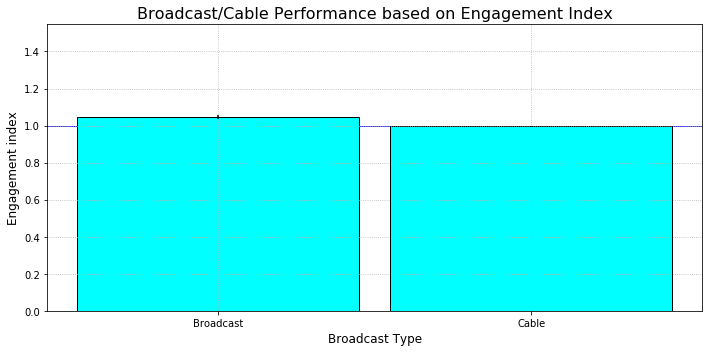


Broadcast is performing slightly better than the average while cable tv is below average



In [184]:
#Plotting network and engagement index
# data lists
Type = sorted_indexType['Type'].tolist()
index_Type = sorted_indexType['Engagement_index_mean'].tolist()
sem = sorted_indexType['Engagement_index_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10, 5))
x_axis = np.arange(len(Type))
ax.set_xticks(x_axis)
ax.set_xticklabels(Type)
plt.ylim(0, max(index_Type)+0.5)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Broadcast Type', fontsize=12)
plt.ylabel('Engagement index', fontsize=12)
plt.title ('Broadcast/Cable Performance based on Engagement Index', fontsize=16)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '-', color='blue', alpha =2, zorder=0)

ax.bar(x_axis, index_Type, width=0.9, yerr = sem, color ='cyan', edgecolor ='k')

plt.tight_layout()
img_path = os.path.join('Images', 'broadcast_performance.png')
plt.savefig(img_path)
plt.show()


#Observations
print(f'''
Broadcast is performing slightly better than the average while cable tv is below average
''')


## Which DayPart Consist of Better Viewer Engagement?

In [177]:
#Preparing dataset
indexDay_grp = index_df[['series', 'daypart', 'Engagement_index']]
indexDay_grp = indexDay_grp.groupby(['daypart']).agg(['mean', 'sem'])
indexDay_grp.columns = indexDay_grp.columns.map('_'.join)
indexDay_grp = indexDay_grp.reset_index()
sorted_indexDay = indexDay_grp.sort_values('Engagement_index_mean', ascending =False)
sorted_indexDay.head()

,daypart,Engagement_index_mean,Engagement_index_sem
4,overnight,1.206587,0.005290
0,daytime,1.045503,0.007716
3,latefringe,1.030778,0.007569
5,prime,0.965884,0.005680
1,earlyfringe,0.952772,0.004583


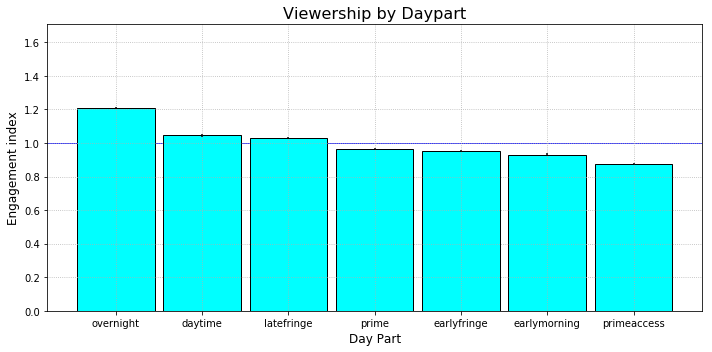


Seems unusual but Overnight and latefringe viewer seems to have better viewer engagement than other day-time period



In [185]:
#Plotting network and engagement index
# data lists
Daypart = sorted_indexDay['daypart'].tolist()
index_Day = sorted_indexDay['Engagement_index_mean'].tolist()
sem = sorted_indexDay['Engagement_index_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10, 5))
x_axis = np.arange(len(Daypart))
ax.set_xticks(x_axis)
ax.set_xticklabels(Daypart)
plt.ylim(0, max(index_Day)+0.5)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Day Part', fontsize=12)
plt.ylabel('Engagement index', fontsize=12)
plt.title ('Viewership by Daypart', fontsize=16)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '-', color='blue', alpha =2, zorder=0)

ax.bar(x_axis, index_Day, width=0.9, yerr = sem, color ='cyan', edgecolor ='k')

plt.tight_layout()
img_path = os.path.join('Images', 'TimeBlock_performance.png')
plt.savefig(img_path)
plt.show()


#Observations
print(f'''
Seems unusual but Overnight and latefringe viewer seems to have better viewer engagement than other day-time period
''')



## Unlike APV, Engagement Index is not Impacted by Run Time.

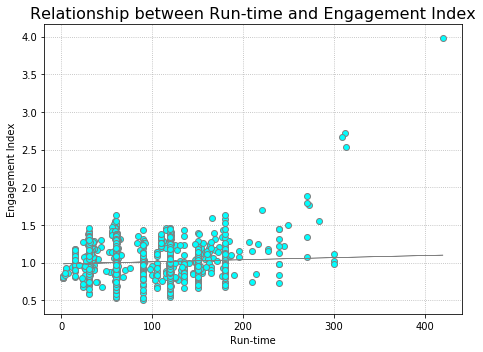


There is no relationship between Engagement Index and Run-time shown by r2_value = 4.0633171582204203e-10



In [186]:
# defining variables
x = index_df['Run_time (min)'].values.tolist()
y = index_df['Engagement_index'].values.tolist()

# linear regression stats and fitline
slope, intercept, p_value, r_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='cyan', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='grey')
plt.grid(linestyle='dotted', zorder=0)


plt.xlabel('Run-time')
plt.ylabel('Engagement Index')
plt.title("Relationship between Run-time and Engagement Index", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('Images', 'Runtime_index.png')
plt.savefig(img_path)
plt.show()



#Observations
print(f'''
There is no relationship between Engagement Index and Run-time shown by r2_value = {r_value**2}
''')
